<a href="https://colab.research.google.com/github/LeTruong2407/SVM-CS115/blob/main/SVM_imageClassfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create directory **Classification_Images** and download 30 images of each category using bing image downloader.

In [ ]:
%mkdir Classification_Images

In [ ]:
!pip install bing_image_downloader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from bing_image_downloader import downloader
downloader.download("dog",limit=30, output_dir="Classification_Images",adult_filter_off=True)

[%] Downloading Images to /content/Classification_Images/dog


[!!]Indexing page: 1

[%] Indexed 17 Images on Page 1.


[%] Downloading Image #1 from http://www.publicdomainpictures.net/pictures/170000/velka/dog-1463218026uIC.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.candogseat-this.com/wp-content/uploads/2014/11/thanksgiving-dog.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.oddee.com/wp-content/uploads/_media/imgs/articles2/a98368_dogshaming_8-tortillas.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://uploads.neatorama.com/images/posts/425/55/55425/1353869106-0.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://1.bp.blogspot.com/_cUuIMoP_aeE/S73Lj3zCtyI/AAAAAAAACTQ/Z3k9Cyz2OfU/s1600/dog.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.oddee.com/wp-content/uploads/_media/imgs/articles2/a98368_dogshaming_12.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://i2.wp.com/whatchar

In [ ]:
from bing_image_downloader import downloader
downloader.download("cat",limit=30, output_dir="Classification_Images",adult_filter_off=True)

[%] Downloading Images to /content/Classification_Images/cat


[!!]Indexing page: 1

[%] Indexed 18 Images on Page 1.


[%] Downloading Image #1 from http://www.jokesoftheday.net/jokes-archive/2014/09/01/Cats.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://klyker.com/wp-content/uploads/2014/09/cats-stuck-in-things-39.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.imgur.com/Kh19UOm.png
[%] File Downloaded !

[%] Downloading Image #4 from http://www.pickchur.com/wp-content/uploads/2013/11/Cat-Island-19.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://i.telegraph.co.uk/multimedia/archive/02304/cat_2304202b.jpg
[Error]Invalid image, not saving http://i.telegraph.co.uk/multimedia/archive/02304/cat_2304202b.jpg

[!] Issue getting: http://i.telegraph.co.uk/multimedia/archive/02304/cat_2304202b.jpg
[!] Error:: Invalid image, not saving http://i.telegraph.co.uk/multimedia/archive/02304/cat_2304202b.jpg

[%] Downloading Image #5 from https://cd

Download **Classification_Images** folder locally

In [ ]:
import shutil
shutil.make_archive('Classification_Images', 'zip', 'Classification_Images')

'/content/Classification_Images.zip'

Generate **requirements.txt**

**Preprocessing of data** using os module

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray

target = []
flat_data = []
images = []
DataDirectory = '/content/Classification_Images'

# Images to be classified as:
Categories = ["cat","dog"]

for i in Categories:
  print("Category is:",i,"\tLabel encoded as:",Categories.index(i))
  # Encode categories
  target_class = Categories.index(i)
  path = os.path.join(DataDirectory,i)
  # Image resizing, to ensure all images are of same dimensions
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(target_class)
# Convert list to numpy array format
flat_data = np.array(flat_data)
images = np.array(images)
target = np.array(target)

Category is: cat 	Label encoded as: 0
Category is: dog 	Label encoded as: 1


**Dataframe creation** using pandas library

In [ ]:
df = pd.DataFrame(flat_data)
df['Target'] = target
df

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.235294,0.149020,0.058824,0.235294,0.149020,0.058824,0.227451,0.141176,0.050980,0.223529,...,0.565085,0.349399,0.137634,0.548273,0.332587,0.120822,0.538933,0.323247,0.111482,0
1,0.349020,0.325490,0.278431,0.352941,0.329412,0.282353,0.356863,0.329412,0.289542,0.360784,...,0.650980,0.580392,0.501961,0.650980,0.580392,0.501961,0.650980,0.580392,0.501961,0
2,0.925173,0.929094,0.905565,0.925490,0.930900,0.905882,0.926868,0.933333,0.909804,0.930680,...,0.755229,0.768627,0.747386,0.762941,0.778627,0.757201,0.764706,0.784314,0.757477,0
3,0.192157,0.086275,0.019608,0.192157,0.086275,0.019608,0.192157,0.086275,0.019608,0.184314,...,0.429412,0.239216,0.089869,0.387582,0.222549,0.119281,0.346405,0.183333,0.085621,0
4,0.380392,0.400000,0.372549,0.384787,0.400000,0.373022,0.393333,0.400388,0.376859,0.400751,...,0.395020,0.316196,0.290031,0.618434,0.508980,0.400311,0.663140,0.532512,0.409610,0
5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
6,0.839216,0.819608,0.745098,0.843137,0.823529,0.749020,0.845752,0.826144,0.751634,0.843137,...,0.043137,0.023529,0.062745,0.043137,0.027451,0.066667,0.044444,0.032680,0.067974,0
7,0.155686,0.257647,0.449804,0.156863,0.261294,0.453451,0.165359,0.269608,0.462745,0.172549,...,0.361111,0.312745,0.283203,0.254627,0.216745,0.185216,0.371333,0.326013,0.295817,0
8,0.717647,0.701961,0.690196,0.717647,0.701961,0.690196,0.720052,0.703564,0.690196,0.711407,...,0.774954,0.760784,0.764706,0.772549,0.760784,0.764706,0.772549,0.760784,0.764706,0
9,0.909804,0.909804,0.760784,0.909804,0.909804,0.760784,0.909804,0.909804,0.760784,0.909804,...,0.909804,0.909804,0.760784,0.909804,0.909804,0.760784,0.909804,0.909804,0.760784,0


AxesImage(54,36;334.8x217.44)


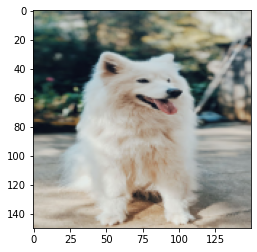

In [ ]:
# Display 1 resized image
print(plt.imshow(images[50]))

**Test and train dataset** creation using sklearn library functions
1.   Data is first split into input and output
2.   Input and Output are further split into testing and training data, individually



In [ ]:
from sklearn.model_selection import train_test_split

# x is all input values of images and their pixel values (number of image images * number of pixel)
# y is output values or correct label of image (number of images * 1 column of labels)

x = df.iloc[:,:-1].values
y = target
print("Input data dimensions:",x.shape)
print("Output data dimensions:",y.shape)

x_train,x_test,y_train,y_test = train_test_split(x,y,shuffle=True,test_size = 0.3,random_state=109,stratify=y)
print("Dimensions of input training data:",x_train.shape)
print("Dimensions of input testing data:",x_test.shape)
print("Dimensions of output training data:",y_train.shape)
print("Dimensions of output testing data:",y_test.shape)

Input data dimensions: (60, 67500)
Output data dimensions: (60,)
Dimensions of input training data: (42, 67500)
Dimensions of input testing data: (18, 67500)
Dimensions of output training data: (42,)
Dimensions of output testing data: (18,)


In [ ]:
print("Labels\t\t   Image index considered")
print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))

Labels		   Image index considered
(array([0, 1]), array([21, 21]))
(array([0, 1]), array([9, 9]))


**Classification** using SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]

# Apply GridSearchCV to find best parameters for given dataset
# verbose is used to describe the steps taken to find best parameters
cv = GridSearchCV(SVC(), tuned_parameters, refit = True,verbose= 2)
cv.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.2s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.2s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.1s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ......................C=10, gamma=0.001,

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             verbose=2)

In [ ]:
# Display parameters selected by GridSearchCV for SVM 3 classes
# Parameters obtained: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
print("Best parameters to apply are:",cv.best_params_)
svm = cv.best_estimator_
print("Model after tuning is:\n",svm)

Best parameters to apply are: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
Model after tuning is:
 SVC(C=10, gamma=0.0001)


In [ ]:
y_prediction = svm.predict(x_test)

In [ ]:
print("Expected results: ",y_test)
print("Predicted results:",y_prediction)

Expected results:  [0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1]
Predicted results: [0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 1]


**Evaluation of model**


1.   **Precision** measures how many positives were actually positive (Positive predictive ability)
2.   **Recall** measures how many positives were correctly predicted (True positive rate)
3.   **Confusion matri**x is a square matrix where rows are true (expected labels) and columns are predicted labels
4.   **Accuracy** measures correctly classified data vs total data

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print("Confusion matrix results:\n",confusion_matrix(y_prediction,y_test))
print("\nClassification report of model:\n",classification_report(y_prediction,y_test))
print("Accuracy score:",100*accuracy_score(y_prediction,y_test))

Confusion matrix results:
 [[5 6]
 [4 3]]

Classification report of model:
               precision    recall  f1-score   support

           0       0.56      0.45      0.50        11
           1       0.33      0.43      0.38         7

    accuracy                           0.44        18
   macro avg       0.44      0.44      0.44        18
weighted avg       0.47      0.44      0.45        18

Accuracy score: 44.44444444444444


Save model using **pickle** library

In [ ]:
import pickle
pickle.dump(svm,open("Classification_Model.p","wb"))

In [ ]:
test_model = pickle.load(open("Classification_Model.p","rb"))

Enter url of image to test: https://thumbs.dreamstime.com/b/beautiful-happy-reddish-havanese-puppy-dog-sitting-frontal-looking-camera-isolated-white-background-46868560.jpg
Dimensions of original image are: (900, 711, 3)
PREDICTED OUTPUT IS: cat


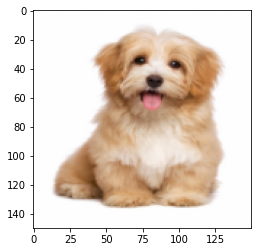

In [ ]:
# Testing for a new image
flat_data = []
url = input ('Enter url of image to test: ')
img_array = imread(url) #https://thumbs.dreamstime.com/b/beautiful-happy-reddish-havanese-puppy-dog-sitting-frontal-looking-camera-isolated-white-background-46868560.jpg
# Resize image
img_resized = resize(img_array,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print("Dimensions of original image are:",img_array.shape)
plt.imshow(img_resized)
y_output = test_model.predict(flat_data)
y_output = Categories[y_output[0]]
print("PREDICTED OUTPUT IS:",y_output)